### Imports

In [19]:
import warnings
warnings.simplefilter("ignore")

from sktime.forecasting.compose import RecursiveTimeSeriesRegressionForecaster
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.naive import NaiveForecaster
from sklearn.ensemble import RandomForestRegressor
from sktime.forecasting.arima import AutoARIMA
from sktime.utils.plotting import plot_series
import pandas as pd
import numpy as np

### Leitura do dataset, formatação dele

In [20]:
df = pd.read_csv("../data/populacao_2020-2023.csv")
df = df.T
df = df.rename(columns={0:"populacao"})
df.index = pd.to_datetime(df.index)
df.index = df.index.to_period("M")
df.populacao = pd.to_numeric(df.populacao)
df.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 48 entries, 2020-01 to 2023-12
Freq: M
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   populacao  48 non-null     int64
dtypes: int64(1)
memory usage: 768.0 bytes


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 48 entries, 2020-01 to 2023-12
Freq: M
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   populacao  48 non-null     int64
dtypes: int64(1)
memory usage: 768.0 bytes


<Axes: >

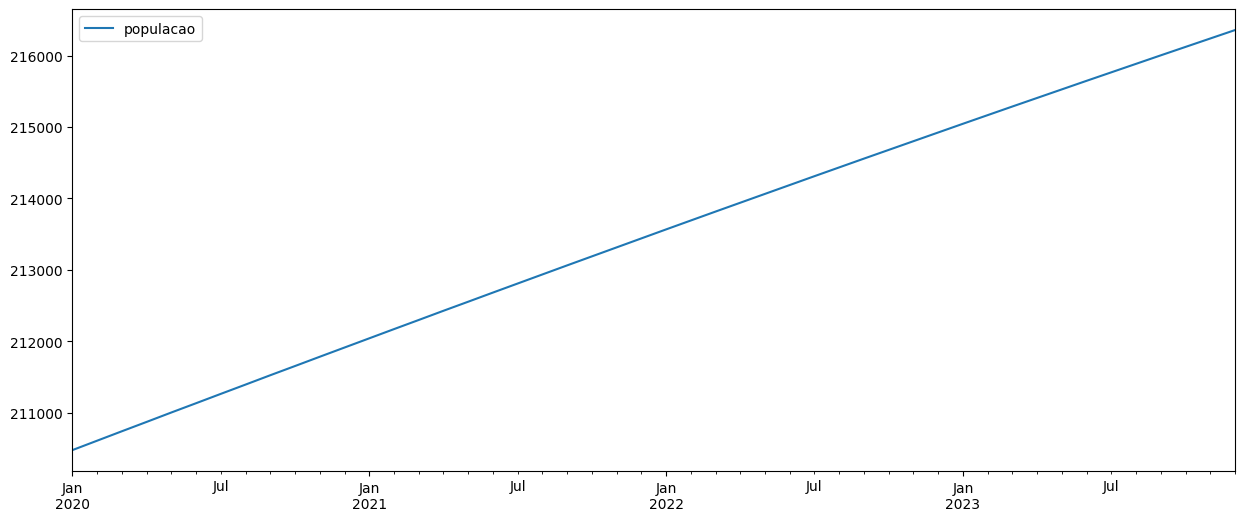

In [22]:
df.plot(figsize=(15,6))

## Separação treino e teste

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

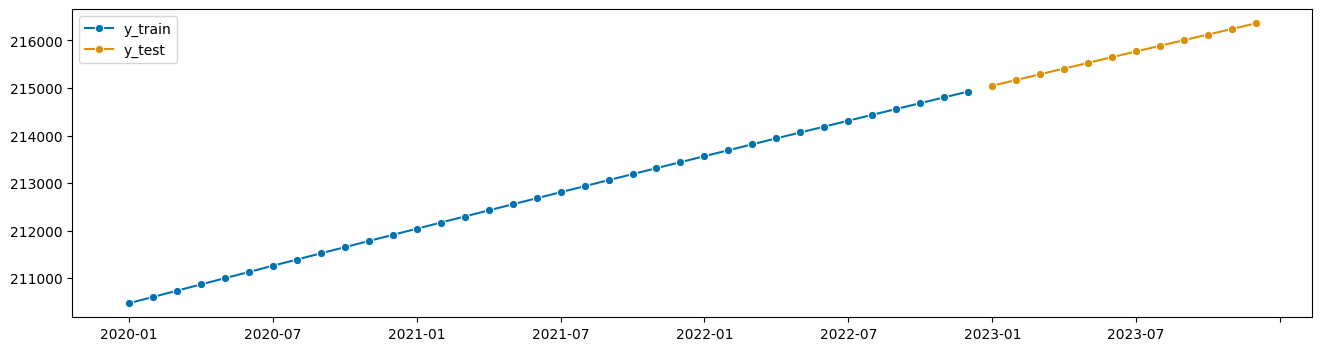

In [23]:
y = df
y_train, y_test = temporal_train_test_split(y)
fh = np.arange(len(y_test))+1
plot_series(y_train, y_test, labels=["y_train", "y_test"])

## Previsões com o método Forecaster 

SMAPE para estratégia last:  MeanAbsolutePercentageError(multilevel=         populacao
2023-01     215046
2023-02     215167
2023-03     215288
2023-04     215408
2023-05     215528
2023-06     215648
2023-07     215767
2023-08     215886
2023-09     216005
2023-10     216123
2023-11     216241
2023-12     216359,
                            multioutput=         populacao
2023-01   214924.0
2023-02   214924.0
2023-03   214924.0
2023-04   214924.0
2023-05   214924.0
2023-06   214924.0
2023-07   214924.0
2023-08   214924.0
2023-09   214924.0
2023-10   214924.0
2023-11   214924.0
2023-12   214924.0)
SMAPE para estratégia drift:  MeanAbsolutePercentageError(multilevel=         populacao
2023-01     215046
2023-02     215167
2023-03     215288
2023-04     215408
2023-05     215528
2023-06     215648
2023-07     215767
2023-08     215886
2023-09     216005
2023-10     216123
2023-11     216241
2023-12     216359,
                            multioutput=             populacao
2023-01  215051.

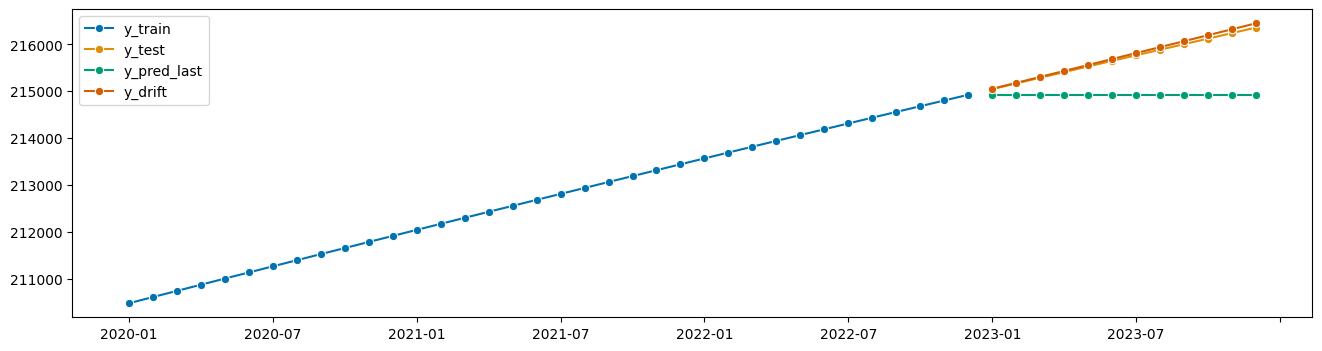

In [24]:
# Naive Forecaster com estratégia 'last'

naive_forecaster_last = NaiveForecaster(strategy="last")
naive_forecaster_last.fit(y_train)
y_last = naive_forecaster_last.predict(fh)

# Naive Forecaster com estratégia 'drift' e sp=12

naive_forecaster_drift = NaiveForecaster(strategy="drift",sp=12)
naive_forecaster_drift.fit(y_train)
y_drift = naive_forecaster_drift.predict(fh)

plot_series(y_train, y_test, y_last,y_drift, labels=["y_train", "y_test", "y_pred_last","y_drift"]);
print('SMAPE para estratégia ''last'': ', MeanAbsolutePercentageError(y_last, y_test))
print('SMAPE para estratégia ''drift'': ', MeanAbsolutePercentageError(y_drift, y_test))

## Previsões com ARIMA

/home/liputer/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SMAPE usando ARIMA:  MeanAbsolutePercentageError(multilevel=         populacao
2023-01     215046
2023-02     215167
2023-03     215288
2023-04     215408
2023-05     215528
2023-06     215648
2023-07     215767
2023-08     215886
2023-09     216005
2023-10     216123
2023-11     216241
2023-12     216359,
                            multioutput=             populacao
2023-01  215045.486405
2023-02  215166.809714
2023-03  215287.741278
2023-04  215408.430257
2023-05  215528.779347
2023-06  215648.852023
2023-07  215768.606877
2023-08  215888.070923
2023-09  216007.226538
2023-10  216126.085217
2023-11  216244.639462
2023-12  216362.894165)


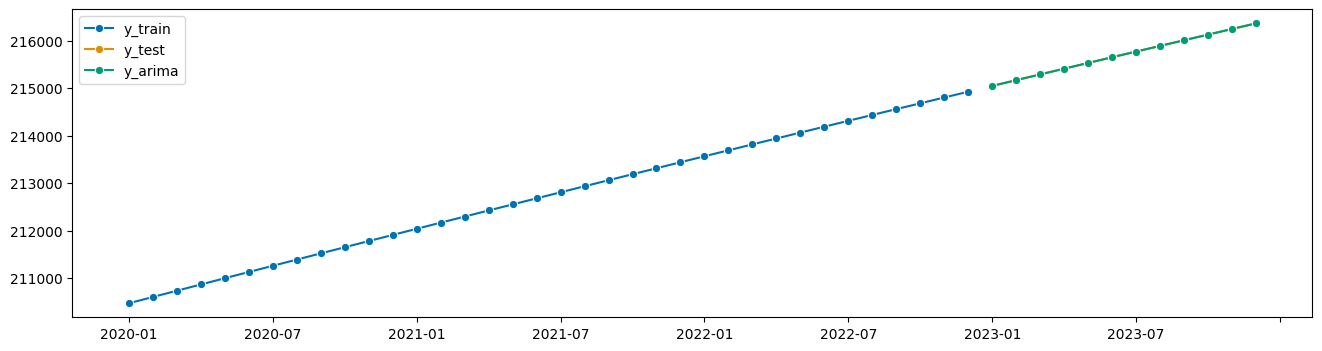

In [27]:
arima_forecasting = AutoARIMA(sp=12)
arima_forecasting.fit(y_train)

# Modelo pode demorar um pouco pois irá testar vários parâmetros.
y_arima = arima_forecasting.predict(fh)

plot_series(y_train, y_test, y_arima, labels=['y_train', 'y_test', 'y_arima'])
print('SMAPE usando ARIMA: ', MeanAbsolutePercentageError(y_arima, y_test))

#### O modelo ARIMA preveu tão corretamente que sobrepôs a linha de y_test. Logo, é o melhor modelo para ser usado no tópico de População.